<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree**
A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks.

# Importing Libraries

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [79]:
df = pd.read_csv('/content/iris.csv')

In [80]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# EDA

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [82]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [83]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [84]:
df.shape

(150, 5)

In [85]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

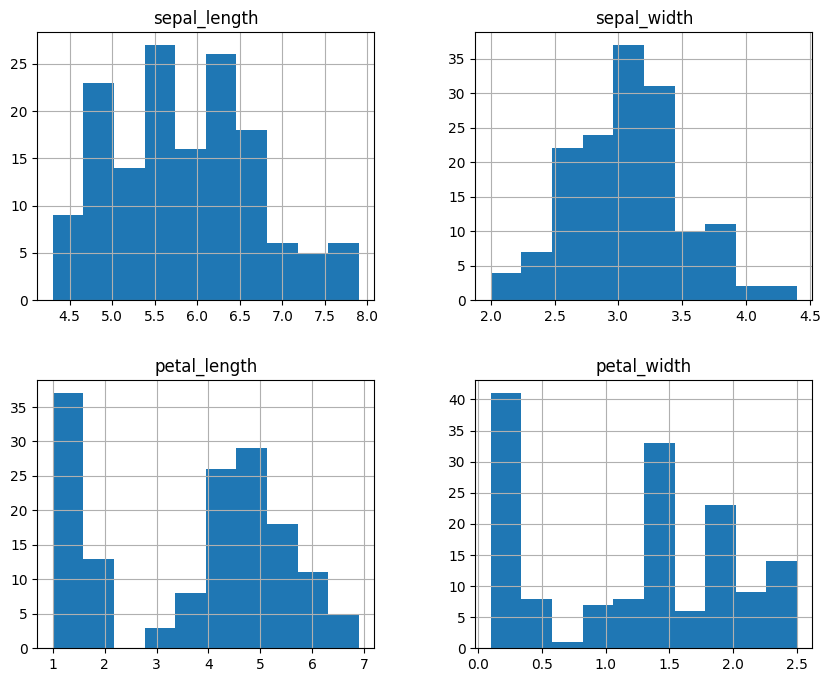

In [86]:
# Histograms for each feature
df.hist(figsize=(10, 8))
plt.show()

# Feature Engineering

In [87]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [88]:
df['species'] = le.fit_transform(df['species'])

In [89]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [90]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [91]:
df['species'].unique()

array([0, 1, 2])

# Model Building

In [92]:
#separate the independent & dependent features

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [93]:
#splitting into training & testing
#keeping 20% for testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)


In [94]:
x_train  #80% data for training

,sepal_length,sepal_width,petal_length,petal_width
95,5.7,3.0,4.2,1.2
88,5.6,3.0,4.1,1.3
0,5.1,3.5,1.4,0.2
46,5.1,3.8,1.6,0.2
11,4.8,3.4,1.6,0.2
...,...,...,...,...
22,4.6,3.6,1.0,0.2
75,6.6,3.0,4.4,1.4
137,6.4,3.1,5.5,1.8
15,5.7,4.4,1.5,0.4


In [95]:
len(x_train)

120

In [96]:
y_train

,species
95,1
88,1
0,0
46,0
11,0
...,...
22,0
75,1
137,2
15,0


In [97]:
x_test  #20% data for testing

,sepal_length,sepal_width,petal_length,petal_width
47,4.6,3.2,1.4,0.2
73,6.1,2.8,4.7,1.2
74,6.4,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
67,5.8,2.7,4.1,1.0
89,5.5,2.5,4.0,1.3
143,6.8,3.2,5.9,2.3
21,5.1,3.7,1.5,0.4
108,6.7,2.5,5.8,1.8
12,4.8,3.0,1.4,0.1


In [98]:
len(x_test)

30

In [99]:
y_test

,species
47,0
73,1
74,1
129,2
67,1
89,1
143,2
21,0
108,2
12,0


In [100]:
#Importing model
from sklearn.tree import DecisionTreeClassifier

In [101]:
#creating the Decision Tree model based on entropy with max_depth of 3
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [102]:
#Traing/fitting the model to training data
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [103]:
#Testing the model to testing data
y_pred = model.predict(x_test)

In [104]:
y_pred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1])

# Performance Metrics

In [105]:
from sklearn.metrics import classification_report

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [107]:
model.score(x_test,y_test)

0.9333333333333333

In [108]:
model.score(x_train,y_train)

0.9833333333333333

# Decision Tree

In [109]:
from sklearn import tree

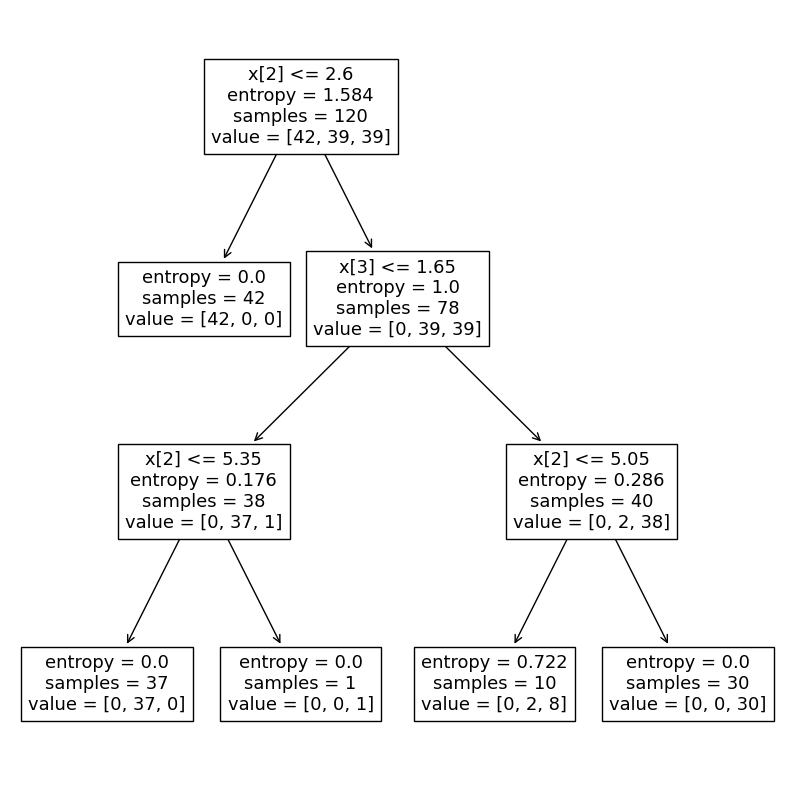

In [110]:
plt.figure(figsize=(10,10))
tree.plot_tree(model)
plt.show()

In [111]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [112]:
fn = x.columns

In [113]:
fn

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [114]:
cn = ['setosa','versicolor','virginica']

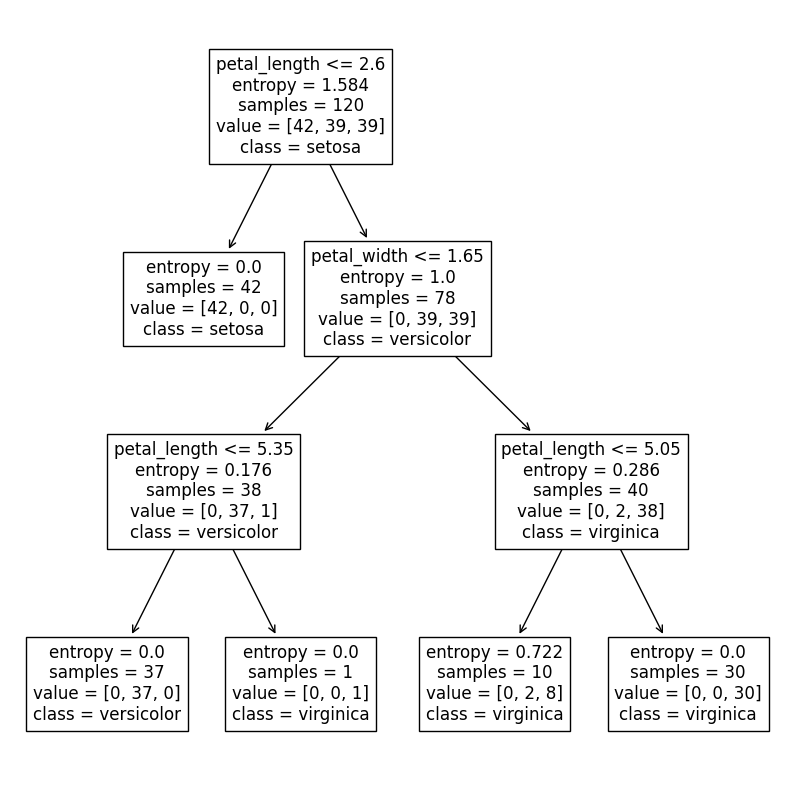

In [115]:
plt.figure(figsize=(10,10))
tree.plot_tree(model, feature_names=fn, class_names=cn)
plt.show()

Conclusion : Virginica is the most dominant feature.

In [116]:
model.feature_importances_

array([0.        , 0.        , 0.67259247, 0.32740753])

In [117]:
#Creating  dataframe of feature importances
feature_importances = pd.DataFrame({'Feature': fn, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
feature_importances

,Feature,Importance
2,petal_length,0.672592
3,petal_width,0.327408
0,sepal_length,0.000000
1,sepal_width,0.000000


sepal_length & sepal_width have zero(0) importance.

petal_width have highest importance(root node).

petal_length	is second highest importance.